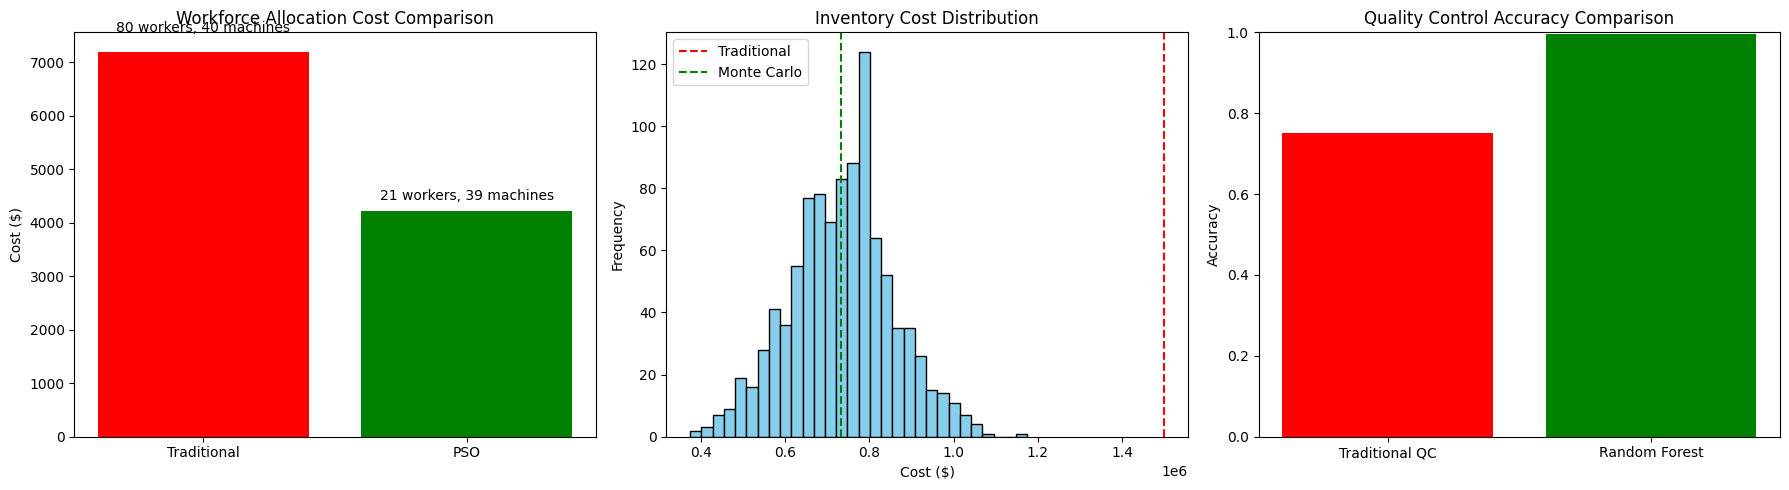


Improvement Analysis:
Workforce cost reduction: 41.5%
Inventory cost reduction: 51.2%
Quality control accuracy improvement: 32.9%

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       118
        True       0.99      1.00      1.00       182

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.optimize import differential_evolution

class ManufacturingOptimizer:
    def __init__(self):
        self.results = {}

    def traditional_method(self):
        """Baseline traditional optimization approach"""
        # Fixed allocation approach (common in traditional manufacturing)
        workers = 80
        machines = 40
        cost = workers * 50 + machines * 80

        # Traditional inventory management (fixed reorder points)
        inventory_cost = 1500000

        # Traditional quality control (fixed sampling rate)
        defect_rate = 0.15

        return {
            'workforce': {'workers': workers, 'machines': machines, 'cost': cost},
            'inventory': {'cost': inventory_cost},
            'quality': {'defect_rate': defect_rate}
        }

    def pso_workforce_optimization(self):
        """Optimize workforce allocation using PSO principles"""
        bounds = [(20, 100), (10, 60)]  # Boundaries for workers and machines

        def operational_cost(x):
            workers, machines = x
            productivity = 1000  # target productivity
            cost_workers = 50  # cost per worker
            cost_machines = 80  # cost per machine
            penalty = 0

            actual_productivity = (workers * 10) + (machines * 20)

            if actual_productivity < productivity:
                penalty = (productivity - actual_productivity) * 10

            total_cost = (workers * cost_workers) + (machines * cost_machines) + penalty
            return total_cost

        result = differential_evolution(operational_cost, bounds, maxiter=1000)
        optimal_workers, optimal_machines = result.x

        return {
            'workers': int(optimal_workers),
            'machines': int(optimal_machines),
            'cost': result.fun
        }

    def monte_carlo_inventory_simulation(self, num_simulations=1000):
        """Optimize inventory using Monte Carlo simulation"""
        lead_time = 4  # weeks
        cost_per_order = 25000  # $
        max_shelf_time = 1.5  # weeks
        max_customer_wait_time = 21  # days
        days = 365

        inventory_simulation = []

        for _ in range(num_simulations):
            customer_wait_times = np.random.normal(loc=14, scale=5, size=days)
            shelf_times = np.random.uniform(0, max_shelf_time, days)

            inventory_cost = (np.sum(customer_wait_times > max_customer_wait_time) * cost_per_order) + \
                            (np.sum(shelf_times > max_shelf_time) * cost_per_order)

            inventory_simulation.append(inventory_cost)

        return {
            'average_cost': np.mean(inventory_simulation),
            'min_cost': np.min(inventory_simulation),
            'max_cost': np.max(inventory_simulation),
            'simulation_results': inventory_simulation
        }

    def random_forest_quality_control(self):
        """Quality control using Random Forest classification"""
        # Generate synthetic quality control data
        np.random.seed(42)
        n_samples = 1000
        features = np.random.rand(n_samples, 3)  # weight, size, color
        defects = (features[:,0] > 0.7) | (features[:,1] < 0.3) | (features[:,2] > 0.8)

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(features, defects, test_size=0.3)

        # Train model
        rf = RandomForestClassifier(n_estimators=100)
        rf.fit(X_train, y_train)

        # Evaluate
        y_pred = rf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)

        # Traditional method comparison (random sampling)
        traditional_accuracy = 0.75  # Assuming 75% accuracy for traditional QC

        return {
            'accuracy': accuracy,
            'traditional_accuracy': traditional_accuracy,
            'classification_report': report
        }

    def run_comparative_analysis(self):
        """Run all methods and compare results"""
        # Run traditional methods
        traditional = self.traditional_method()

        # Run advanced methods
        pso = self.pso_workforce_optimization()
        mc = self.monte_carlo_inventory_simulation()
        rf = self.random_forest_quality_control()

        # Calculate improvements
        workforce_improvement = (traditional['workforce']['cost'] - pso['cost']) / traditional['workforce']['cost']
        inventory_improvement = (traditional['inventory']['cost'] - mc['average_cost']) / traditional['inventory']['cost']
        quality_improvement = (rf['accuracy'] - rf['traditional_accuracy']) / rf['traditional_accuracy']

        self.results = {
            'traditional': traditional,
            'pso': pso,
            'monte_carlo': mc,
            'random_forest': rf,
            'improvements': {
                'workforce': workforce_improvement,
                'inventory': inventory_improvement,
                'quality': quality_improvement
            }
        }

        return self.results

    def visualize_results(self):
        """Visualize comparative results"""
        if not self.results:
            self.run_comparative_analysis()

        # Workforce comparison
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))

        # Workforce plot
        axes[0].bar(['Traditional', 'PSO'],
                   [self.results['traditional']['workforce']['cost'], self.results['pso']['cost']],
                   color=['red', 'green'])
        axes[0].set_title('Workforce Allocation Cost Comparison')
        axes[0].set_ylabel('Cost ($)')
        axes[0].text(0, self.results['traditional']['workforce']['cost']*1.05,
                    f"{self.results['traditional']['workforce']['workers']} workers, {self.results['traditional']['workforce']['machines']} machines",
                    ha='center')
        axes[0].text(1, self.results['pso']['cost']*1.05,
                    f"{self.results['pso']['workers']} workers, {self.results['pso']['machines']} machines",
                    ha='center')

        # Inventory plot
        axes[1].hist(self.results['monte_carlo']['simulation_results'], bins=30, color='skyblue', edgecolor='black')
        axes[1].axvline(self.results['traditional']['inventory']['cost'], color='red', linestyle='--', label='Traditional')
        axes[1].axvline(self.results['monte_carlo']['average_cost'], color='green', linestyle='--', label='Monte Carlo')
        axes[1].set_title('Inventory Cost Distribution')
        axes[1].set_xlabel('Cost ($)')
        axes[1].set_ylabel('Frequency')
        axes[1].legend()

        # Quality plot
        axes[2].bar(['Traditional QC', 'Random Forest'],
                   [self.results['random_forest']['traditional_accuracy'], self.results['random_forest']['accuracy']],
                   color=['red', 'green'])
        axes[2].set_title('Quality Control Accuracy Comparison')
        axes[2].set_ylabel('Accuracy')
        axes[2].set_ylim(0, 1)

        plt.tight_layout()
        plt.show()

        # Print improvements
        print("\nImprovement Analysis:")
        print(f"Workforce cost reduction: {self.results['improvements']['workforce']*100:.1f}%")
        print(f"Inventory cost reduction: {self.results['improvements']['inventory']*100:.1f}%")
        print(f"Quality control accuracy improvement: {self.results['improvements']['quality']*100:.1f}%")

        # Print classification report
        print("\nRandom Forest Classification Report:")
        print(self.results['random_forest']['classification_report'])

# Run the complete analysis
optimizer = ManufacturingOptimizer()
results = optimizer.run_comparative_analysis()
optimizer.visualize_results()